## Observations and Insights 

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
all_data_df= pd.merge(mouse_metadata, study_results, on = "Mouse ID", how= "left")
# Display the data table for preview
all_data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [35]:
# Checking the number of mice.
all_data_df["Mouse ID"].count()


1893

In [36]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_id = all_data_df.loc[all_data_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_mice_id

#only g989 is duplicated with mouse id and timepoint

array(['g989'], dtype=object)

In [37]:
# Optional: Get all the data for the duplicate mouse ID. 

In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_metadata[all_data_df["Mouse ID"].isin(dup_mice_id) == False]
clean_result_df = study_results[study_results["Mouse ID"].isin(dup_mice_id) == 
False]

merge_clean_df = pd.merge(clean_mouse_df, clean_result_df, on = "Mouse ID", how = "left")
merge_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0.0,45.000000,0.0
1,k403,Ramicane,Male,21,16,5.0,38.825898,0.0
2,k403,Ramicane,Male,21,16,10.0,35.014271,1.0
3,k403,Ramicane,Male,21,16,15.0,34.223992,1.0
4,k403,Ramicane,Male,21,16,20.0,32.997729,1.0


In [39]:
# Checking the number of mice in the clean DataFrame.
merge_clean_df["Mouse ID"].count()

1881

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = round(merge_clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"], 2)
median = round(merge_clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"],2)
variance = round(merge_clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"],2)
sem = round(merge_clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"],2)

summary = {
    "Mean" : mean,
    "Median" :median,
    "Variance" :variance,
    "Sem" : sem

}

summary_table = pd.DataFrame(summary)
summary_table


,Mean,Median,Variance,Sem
Drug Regimen,,,,
Capomulin,40.68,41.56,24.95,0.33
Ceftamin,52.59,51.78,39.29,0.47
Infubinol,52.88,51.82,43.13,0.49
Ketapril,55.24,53.70,68.55,0.60
Naftisol,54.33,52.51,66.17,0.60
Placebo,54.03,52.29,61.17,0.58
Propriva,52.32,50.45,43.85,0.54
Ramicane,40.22,40.67,23.49,0.32
Stelasyn,54.23,52.43,59.45,0.57


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_group = merge_clean_df.groupby("Drug Regimen")
summary_table_2 = round(drug_group.agg(['mean', 'median', 'var','std','sem'])["Tumor Volume (mm3)"],2)
summary_table_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [42]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

num_mice_treat = all_data_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

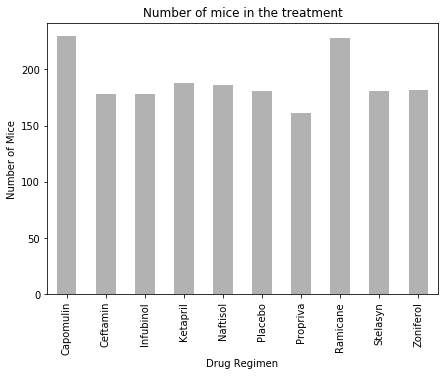

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [43]:
bar_pandas = num_mice_treat.plot.bar( color ='k', align = "center", figsize =(7,5), alpha = 0.3)
# alpha can change the color lighter or darker
plt.title("Number of mice in the treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
bar_pandas
plt.savefig("Images/mice_bar_pandas.png", bbox_inches ="tight")
plt.show()
# To show the data below the bar chart
num_mice_treat

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

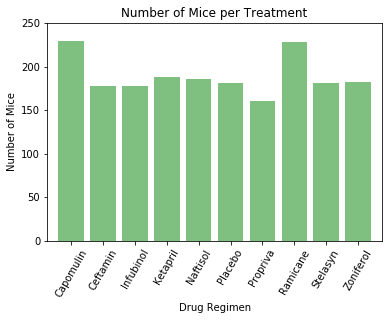

In [44]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

mice_xaxis = np.arange(len(num_mice_treat))
plt.bar(mice_xaxis, num_mice_treat, color ="g", align = "center", alpha = 0.5)

# set labels
labels_location = [value for value in mice_xaxis]

plt.xticks(labels_location, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation = "60")

#must make it to vertical in order to see clearly
# Set the limits of the x and y axis
plt.xlim(-0.75, len(mice_xaxis)-0.25)
plt.ylim(0, max(num_mice_treat)+20)

plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Mice",fontsize = 10)

plt.savefig("Images/mice_bar_pyplot.png", bbox_inches ="tight")
num_mice_treat

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_gender = all_data_df.groupby(["Mouse ID", "Sex"])
mice_gender
gender_df = pd.DataFrame(mice_gender.size())

# dataframe with count of female and male mice
count_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
count_gender.columns = ["No. of each"]

count_gender["Percentage of Sex"] = round((count_gender["No. of each"]/count_gender["No. of each"].sum())* 100,2)
count_gender


,No. of each,Percentage of Sex
Sex,,
Female,124,49.8
Male,125,50.2


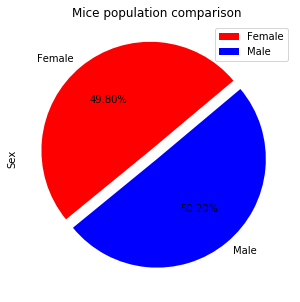

In [46]:
# Pie Chart pandas
colors = ["red", "blue"]
explode = [0.1, 0]
pandas_pie = count_gender.plot.pie( y= "No. of each", colors = colors, explode = explode, shadow = False, autopct = "%.2f%%", startangle= 40, figsize = (10, 5))

plt.title("Mice population comparison")
plt.ylabel("Sex")

plt.savefig("Images/pie_pandas_gender_mice.png", bbox_inches ="tight")
plt.show()


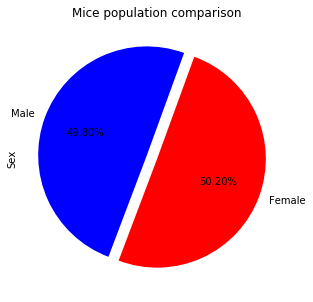

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# fig,ax = plt.subplots()
# fig = plt.figure()
# ax = fig.add_subplot(111)

sex_labels = ["Male", "Female"]

sizes = [49.8, 50.2]

colors =["blue", "red"]

explode = [0.1,0]

fig, ax = plt.subplots(figsize = (10,5))
plt.pie(sizes, colors = colors, explode = explode, labels = sex_labels, autopct= "%.2f%%", shadow= False, startangle= 70)
plt.title("Mice population comparison")
plt.ylabel("Sex")

plt.savefig("Images/pie_pyplot_gender_mice.png", bbox_inches ="tight")
plt.show()



## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_df = all_data_df.loc[all_data_df["Drug Regimen"] == "Capomulin", :]
ramicane_df = all_data_df.loc[all_data_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = all_data_df.loc[all_data_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = all_data_df.loc[all_data_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [49]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
   
    # add subset   
    
    # Determine outliers using upper and lower bounds
    

In [50]:
# Capomulin
capomulin_greatest = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
capomulin__vol = pd.DataFrame(capomulin_greatest)
capomulin_merge = pd.merge(capomulin__vol, all_data_df, on = ("Mouse ID", "Timepoint"), how = "left")
capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [51]:
#   Capomulin quartiles
tumor_capomulin = capomulin_merge["Tumor Volume (mm3)"]

quantile_capomulin = tumor_capomulin.quantile([0.25, 0.5, 0.75])
lowerq_capomulin = quantile_capomulin[0.25]
upperq_capomulin = quantile_capomulin[0.75]
iqr_capomulin = upperq_capomulin - lowerq_capomulin 

lowerbound_capomulin = lowerq_capomulin - (1.5 * iqr_capomulin)
upperbound_capomulin = upperq_capomulin- (1.5 * iqr_capomulin)

print(f"The upper quantile of Capomulin: {round(upperq_capomulin,2)}")
print(f"The lower quantile of Capomulin: {round(lowerq_capomulin,2)}")
print(f"The interquartile of Capomulin: {round(iqr_capomulin,2)}")
print(f"The median of Capomulin: {round(quantile_capomulin[0.5],2)}")
print(f"The outliers could be the values above {round(upperbound_capomulin,2)} and below {round(lowerbound_capomulin,2)}")

The upper quantile of Capomulin: 40.16
The lower quantile of Capomulin: 32.38
The interquartile of Capomulin: 7.78
The median of Capomulin: 38.13
The outliers could be the values above 28.49 and below 20.7


In [52]:
# Ramicane
ramicane_greatest = ramicane_df.groupby("Mouse ID").max()["Timepoint"]
ramicane_vol = pd.DataFrame(ramicane_greatest)
ramicane_merge = pd.merge(ramicane_vol, all_data_df, on = ("Mouse ID", "Timepoint"), how = "left")
ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [53]:
#   Ramicane quartiles
tumor_ramicane = ramicane_merge["Tumor Volume (mm3)"]

quantile_ramicane = tumor_ramicane.quantile([0.25, 0.5, 0.75])
lowerq_ramicane = quantile_ramicane[0.25]
upperq_ramicane = quantile_ramicane[0.75]
iqr_ramicane = upperq_ramicane - lowerq_ramicane 

lowerbound_ramicane = lowerq_ramicane- (1.5 * iqr_ramicane)
upperbound_ramicane = upperq_ramicane- (1.5 * iqr_ramicane)

print(f"The upper quantile of ramicane: {round(upperq_ramicane,2)}")
print(f"The lower quantile of ramicane: {round(lowerq_ramicane,2)}")
print(f"The interquartile of ramicane: {round(iqr_ramicane,2)}")
print(f"The median of ramicane: {round(quantile_ramicane[0.5],2)}")
print(f"The outliers could be the values above {round(upperbound_ramicane,2)} and below {round(lowerbound_ramicane,2)}")

The upper quantile of ramicane: 40.66
The lower quantile of ramicane: 31.56
The interquartile of ramicane: 9.1
The median of ramicane: 36.56
The outliers could be the values above 27.01 and below 17.91


In [54]:
# infubinol
infubinol_greatest = infubinol_df.groupby("Mouse ID").max()["Timepoint"]
infubinol_vol = pd.DataFrame(infubinol_greatest)
infubinol_merge = pd.merge(infubinol_vol, all_data_df, on = ("Mouse ID", "Timepoint"), how = "left")
infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [55]:
#   infubinol quartiles 
tumor_infubinol = infubinol_merge["Tumor Volume (mm3)"]

quantile_infubinol = tumor_infubinol.quantile([0.25, 0.5, 0.75])
lowerq_infubinol= quantile_infubinol[0.25]
upperq_infubinol= quantile_infubinol[0.75]
iqr_infubinol = upperq_infubinol - lowerq_infubinol

lowerbound_infubinol = lowerq_infubinol- (1.5 * iqr_infubinol)
upperbound_infubinol = upperq_infubinol - (1.5 * iqr_infubinol)

print(f"The upper quantile of infubinol: {round(upperq_infubinol,2)}")
print(f"The lower quantile of infubinol: {round(lowerq_infubinol,2)}")
print(f"The interquartile of infubinol: {round(iqr_infubinol,2)}")
print(f"The median of infubinol: {round(quantile_infubinol[0.5],2)}")
print(f"The outliers could be the values above {round(upperbound_infubinol,2)} and below {round(lowerbound_infubinol,2)}")

The upper quantile of infubinol: 65.53
The lower quantile of infubinol: 54.05
The interquartile of infubinol: 11.48
The median of infubinol: 60.17
The outliers could be the values above 48.31 and below 36.83


In [56]:
# ceftamin
ceftamin_greatest = ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
ceftamin__vol = pd.DataFrame(ceftamin_greatest)
ceftamin_merge = pd.merge(ceftamin__vol, all_data_df, on = ("Mouse ID", "Timepoint"), how = "left")
ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [57]:
#  ceftamin quartiles
tumor_ceftamin = ceftamin_merge["Tumor Volume (mm3)"]

quantile_ceftamin = tumor_ceftamin.quantile([0.25, 0.5, 0.75])
lowerq_ceftamin = quantile_ceftamin[0.25]
upperq_ceftamin = quantile_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin- lowerq_ceftamin

lowerbound_ceftamin = lowerq_ceftamin - (1.5 * iqr_ramicane)
upperbound_ceftamin = upperq_ceftamin - (1.5 * iqr_ramicane)

print(f"The upper quantile of ceftamin: {round(upperq_ceftamin,2)}")
print(f"The lower quantile of ceftamin: {round(lowerq_ceftamin,2)}")
print(f"The interquartile of ceftamin: {round(iqr_ceftamin,2)}")
print(f"The median of ceftamin {round(quantile_ceftamin[0.5],2)}")
print(f"The outliers could be the values above {round(upperbound_ceftamin,2)} and below {round(lowerbound_ceftamin,2)}")

The upper quantile of ceftamin: 64.3
The lower quantile of ceftamin: 48.72
The interquartile of ceftamin: 15.58
The median of ceftamin 59.85
The outliers could be the values above 50.65 and below 35.07


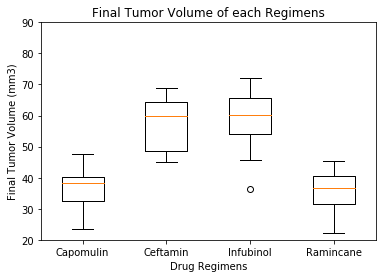

In [58]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Box Plot
tumor_plot = [tumor_capomulin, tumor_ceftamin, tumor_infubinol, tumor_ramicane]
Regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ramincane"]
colors = ["blue", "green", "red", "black"]


fig2, ax2 = plt.subplots()
ax2.set_title("Final Tumor Volume of each Regimens")
ax2.set_xlabel("Drug Regimens")
ax2.set_ylabel("Final Tumor Volume (mm3)")
ax2.boxplot(tumor_plot, labels = Regimen, widths = 0.5)

plt.ylim(20,90)

plt.savefig("Images/tumor_box_plot.png", bbox_inches = "tight")

plt.show()


## Line and Scatter Plots

In [59]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Capomulin

line_tumor_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128", :]
line_tumor_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


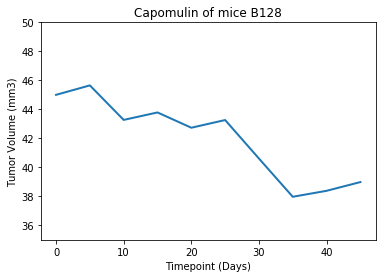

In [60]:
x_axis = line_tumor_df["Timepoint"]
tumor_size = line_tumor_df["Tumor Volume (mm3)"]

fig3, ax3 = plt.subplots()
ax3.set_title("Capomulin of mice B128")
ax3.set_xlabel("Timepoint (Days)")
ax3.set_ylabel("Tumor Volume (mm3)")
ax3.plot(x_axis, tumor_size, linewidth = 2, markersize =12)

plt.ylim(35,50)

plt.savefig('Images/line_plots.png', bbox_inches = "tight")
plt.show()

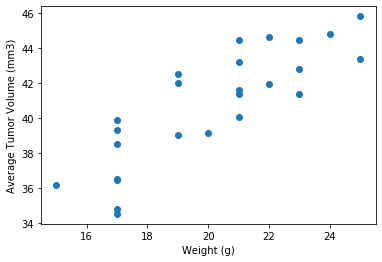

In [61]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('Images/scatterplot.png', bboxinches = "tight")
plt.show()


# Correlation and Regression

In [62]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = st.pearsonr(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])[0]
print(f"The correlation of Weight of mouse to Tumor Volume average: {round(corr,2)}")

The correlation of Weight of mouse to Tumor Volume average: 0.84


The r-squared is: 0.7088568047708717


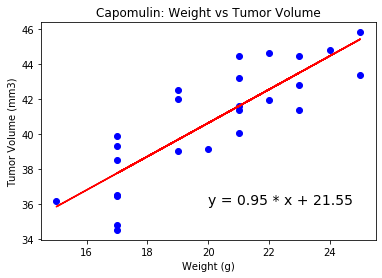

In [69]:
# correlation coefficient and linear regression model： slope, intercept, r-value, pandas, stderr

x_corr = capomulin_avg["Weight (g)"]
y_corr = capomulin_avg["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stederr) = linregress(x_corr, y_corr) 
regress_values = x_corr * slope + intercept

line_eq = f"y = {round(slope,2)} * x + {round(intercept,2)}"

plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"],color='b')
plt.plot(capomulin_avg["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin: Weight vs Tumor Volume")
print(f"The r-squared is: {rvalue**2}")
plt.show()